# Objectives
1. Best practices
 - 1.1 Docstrings
 - 1.2 Dry and do one thing
 - 1.3 Pass by assignment (mutable vs immutable)
2. Context managers
 - 2.1 Use 'with' to enter and exit a context
 - 2.2 Write your owner context managers by using context manager decorators
3. Docorators
 - 3.1 How decorators work
 - 3.2 How to use decorators
 - 3.3 How to write your own decorators
 - 3.4 How to use functools 
 - 3.5 How to write decorators that take arguments

## 1. Best Practices

### 1.1 Docstrings

In [2]:
def function_name(arguments):
    """
    Description of what the function does.
   
    Description of the arguments, if any.
      
    Description of the return value(s), if any.
      
    Description of errors raised, if any.
      
    Optional extra notes or examples of usage.
    """
    return 42
print(function_name.__doc__)


    Description of what the function does.
   
    Description of the arguments, if any.
      
    Description of the return value(s), if any.
      
    Description of errors raised, if any.
      
    Optional extra notes or examples of usage.
    


In [4]:
import inspect
print(inspect.getdoc(function_name))

Description of what the function does.

Description of the arguments, if any.
  
Description of the return value(s), if any.
  
Description of errors raised, if any.
  
Optional extra notes or examples of usage.


**Docstring formats**
- Google style
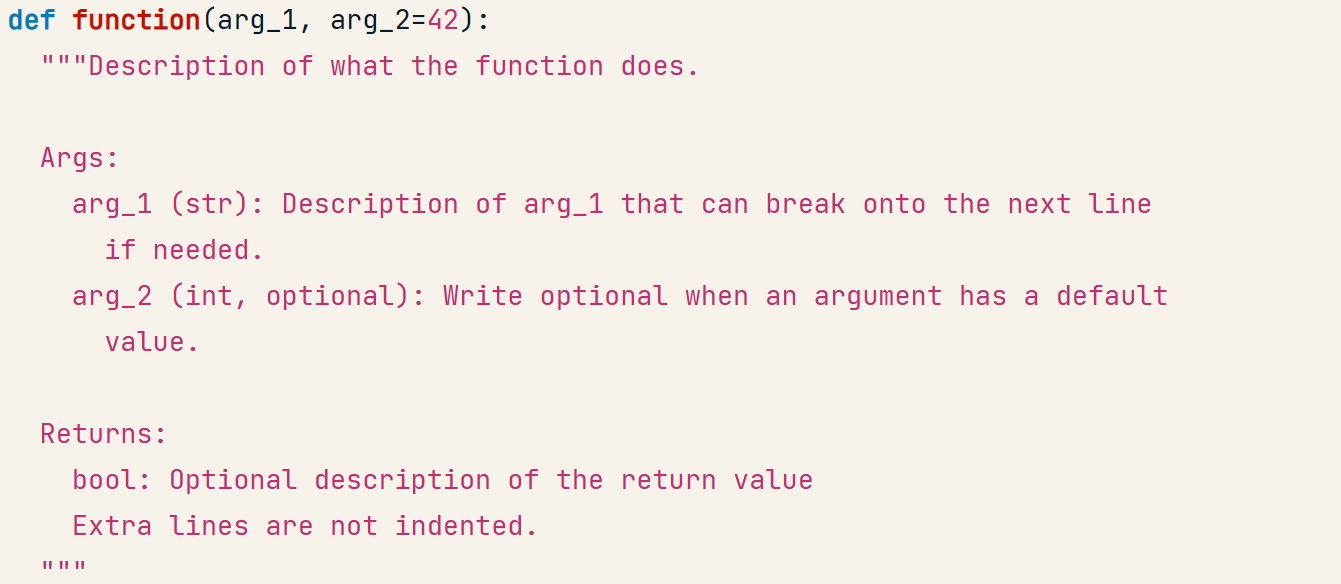
- Numpydoc
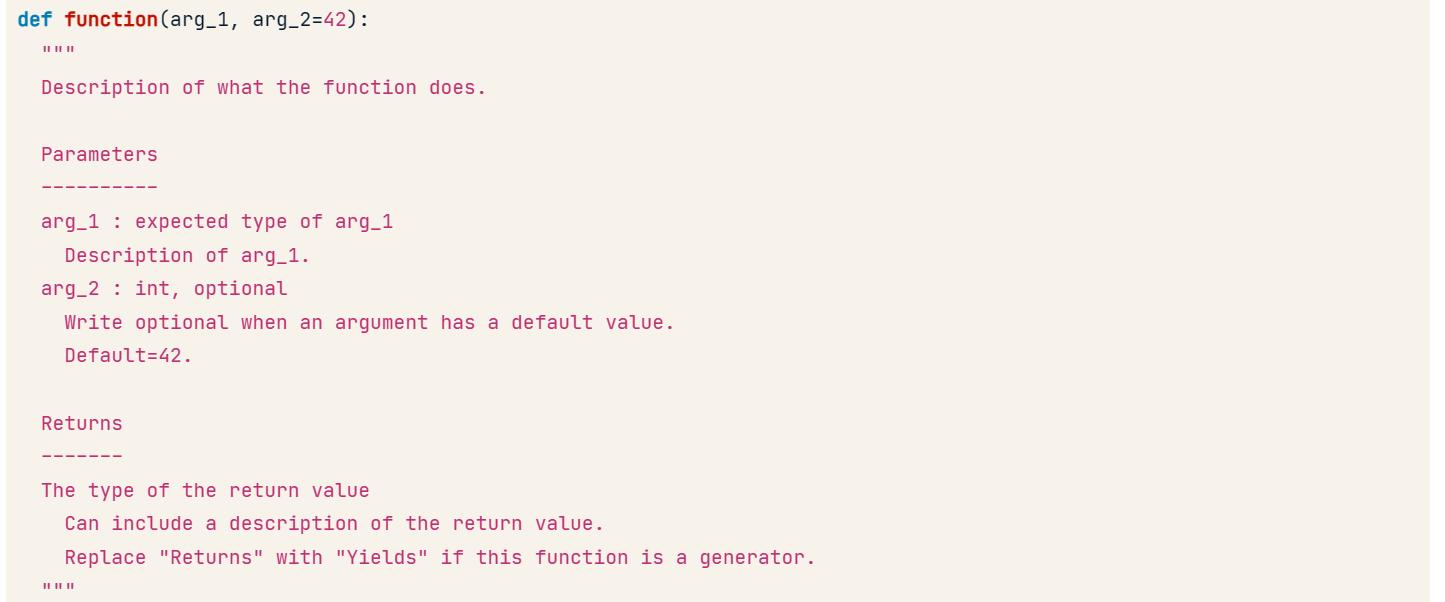
- reStructuredText
- EpyText

In [ ]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

In [ ]:
# Get the "count_letter" docstring by using an attribute of the function
docstring = count_letter.__doc__

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

In [ ]:
import inspect

def build_tooltip(function):
  """Create a tooltip for any function that shows the
  function's docstring.

  Args:
    function (callable): The function we want a tooltip for.

  Returns:
    str
  """
  # Get the docstring for the "function" argument by using inspect
  docstring = inspect.getdoc(function)
  border = '#' * 28
  return '{}\n{}\n{}'.format(border, docstring, border)

print(build_tooltip(count_letter))
print(build_tooltip(range))
print(build_tooltip(print))

### 1.2 DRY and "Do One Thing"

- Use functions to avoid repetition
- Every function has only one responsibility

In [7]:
""" Standardize the GPAs for each year"""
"""df['y1_z'] = (df.y1_gpa - df.y1_gpa.mean()) / df.y1_gpa.std()"""
"""df['y2_z'] = (df.y2_gpa - df.y2_gpa.mean()) / df.y2_gpa.std()"""
"""df['y3_z'] = (df.y3_gpa - df.y3_gpa.mean()) / df.y3_gpa.std()"""
"""df['y4_z'] = (df.y4_gpa - df.y4_gpa.mean()) / df.y4_gpa.std()"""

"df['y4_z'] = (df.y4_gpa - df.y4_gpa.mean()) / df.y4_gpa.std()"

In [ ]:
def standardize(column):
  """Standardize the values in a column.

  Args:
    column (pandas Series): The data to standardize.

  Returns:
    pandas Series: the values as z-scores
  """
  # Finish the function so that it returns the z-scores
  z_score = (column - column.mean()) / column.std()
  return z_score

# Use the standardize() function to calculate the z-scores
df['y1_z'] = standardize(df.y1_gpa)
df['y2_z'] = standardize(df.y2_gpa)
df['y3_z'] = standardize(df.y3_gpa)
df['y4_z'] = standardize(df.y4_gpa)

print(df['y1_z'])

In [ ]:
Output:

0     0.791
1    -0.873
2    -1.113
3     0.202
4     0.884
      ...  
95    0.772
96   -1.420
97   -0.416
98   -1.057
99   -0.641
Name: y1_z, Length: 100, dtype: float64

**Split up the function**

In [ ]:
# write a mean and median function
def mean_and_median(values):
  """Get the mean and median of a sorted list of `values`

  Args:
    values (iterable of float): A list of numbers

  Returns:
    tuple (float, float): The mean and median
  """
  mean = sum(values) / len(values)
  midpoint = int(len(values) / 2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median = values[midpoint]

  return mean, median

In [ ]:
def mean(values):
  """Get the mean of a sorted list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the mean() function
  mean = sum(values)/len(values)
  return mean
print(mean([1,2,3]))

2.0

In [ ]:
def median(values):
  """Get the median of a sorted list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the median() function
  midpoint = int(len(values)/2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint])/2
  else:
    median = values[midpoint]
  return median

print(median([1,2,3,4]))

In [ ]:
2.5

### 1.3 Pass by assignment

In [8]:
a = [1,2,3]
b = a # b and a point to the same list 
a.append(4)
print(b)

[1, 2, 3, 4]


In [9]:
b.append(5) # b appended, a appended too
print(a)

[1, 2, 3, 4, 5]


In [10]:
a = 42 # a assigned to new number 42, no related to b anymore 
print(b)

[1, 2, 3, 4, 5]


In [12]:
def foo(x):
    x[0] = 99
my_list = [1,2,3]
foo(my_list)
print(my_list)

[99, 2, 3]


In [13]:
def bar(x):
    x = x + 90
my_var = 3
bar(my_var)
print(my_var)

3


> - Immutable: int,float,bool,string,bytes,tuple,frozenset,None
> - Mutable: list,dict,set,bytearray,objects, functions, almost everything else!

**Mutable default arguments are dangerous!**

In [14]:
def foo(var=[]):
    var.append(1)
    return var
foo()

[1]

In [15]:
foo() # everytime function result changes, set to None to avoid. 

[1, 1]

In [16]:
def foo(var=None):
    if var is None:
        var = []
    var.append(1)
    return var
foo()

[1]

In [17]:
foo()

[1]

In [ ]:
# Use an immutable variable for the default argument
def better_add_column(values, df=None):
  """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  # Update the function to create a default DataFrame
  if df is None:
    df = pandas.DataFrame()
  df['col_{}'.format(len(df.columns))] = values
  return df

## 2. Context Managers
Context managers are a convenient way to provide connections in Python and guarantee that those connections get cleaned up when you are done using them. 
- Sets up a context
- Runs your code
- Removes the context
> Like caterers in a party

### 2.1 Using context managers

**open() does three things:**
- set up a context by opening a file
- lets you run any code you want on that file
- removes the context by closing the file

In [ ]:
with open('my_file.txt') as my_file:
    text = my_file.read()
    length = len(text)
    
print('the file is {} characters long'.format(length))

In [ ]:
with <context-manager>(<args>):
    # Run your code here 
    # This code is running "inside the context"
#This code runs after the context is removed 

In [ ]:
# Open "alice.txt" and assign the file to "file"
with open('alice.txt') as file:
  text = file.read()

n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1

print('Lewis Carroll uses the word "cat" {} times'.format(n))

Lewis Carroll uses the word "cat" 24 times

In [ ]:
image = get_image_from_instagram()

# Time how long process_with_numpy(image) takes to run
with timer():
  print('Numpy version')
  process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
  print('Pytorch version')
  process_with_pytorch(image)

In [ ]:
Output:
    
Numpy version
Processing..........done!
Elapsed: 1.52 seconds
Pytorch version
Processing..........done!
Elapsed: 0.33 seconds

### 2.2 Writing your own context managers
- Class-based
- Function-based
- Technically a generator that yields a single value

**Function-based**: 
- 1. Define a function 
- 2. (Optional) Add any set up code your context needs.
- 3. Use the 'yield' keyword to signal to Python this is a special kind of function 
- 4. (Optional) Add any teardown code your context needs
- 5. Add the '@contextlib.contextmanager'decorator

In [ ]:
def my_context():
    # Add any set up code you need
    yield 
    # Add any teardown code you need 

In [22]:
# The "yield" keyword 
@contextlib.contextmanager
def my_context():
    print('hello')
    yield 42
    print('goodbye')

In [ ]:
with my_context() as foo: 
    # assign yield 42 to the variable foo
    print('foo is {}'.format(foo))

In [ ]:
Output:

hello 
foo is 42
goodbye

In [ ]:
# Add a decorator that will make timer() a context manager
@contextlib.contextmanager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield None
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))

with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)

In [ ]:
Output:

    This should take approximately 0.25 seconds
    Elapsed: 0.25s'

In [ ]:
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('my_file.txt') as my_file:
  print(my_file.read())

### Advance topic 

**Nested contexts**

In [ ]:
with open('my_file.txt') as my_file:
    for line in my_file:
        # do something 

In [ ]:
def copy(src,dst):
    """Copy the contents of one file to another.
    
    Args:
      src(str): File name of the file to be copied.
      dst(str): Write to write the new file.
      """
    # Open both files
    with open(src) as f_dst:
        with open(dst, 'w') as f_dst:
            # read and write each line, one at at ime
            for line in f_src:
                f_dst.write(line)

**Handling errors**

Context manager patterns: 
- open / close 
- lock / release
- change / reset
- enter / exit
- start / stop
- setup / Teardown 
- Connect / Disconnect 

In [ ]:
def get_printer(ip):
    p = connect_to_printer(ip)
    
    try:
        yield
    finally: 
        p.disconnect()
        print('disconnected from printer')
        
doc = {'text':'This is my text.'}

with get_printer('10.0.34.111') as printer:
    printer.print_page(doc['txt'])

In [ ]:
try: 
    # code that might raise an error
except:
    # do something about the error
finally:
    # this code runs no matter what

In [ ]:
# Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
with stock('NVDA') as nvda:
  # Open "NVDA.txt" for writing as f_out
  with open('NVDA.txt', 'w') as f_out:
    for _ in range(10):
      value = nvda.price()
      print('Logging ${:.2f} for NVDA'.format(value))
      f_out.write('{:.2f}\n'.format(value))

In [ ]:
Output:
    
    Opening stock ticker for NVDA
    Logging $139.50 for NVDA
    Logging $139.54 for NVDA
    Logging $139.61 for NVDA
    Logging $139.65 for NVDA
    Logging $139.72 for NVDA
    Logging $139.73 for NVDA
    Logging $139.80 for NVDA
    Logging $139.78 for NVDA
    Logging $139.73 for NVDA
    Logging $139.64 for NVDA
    Closing stock ticker

In [ ]:
def in_dir(directory):
  """Change current working directory to `directory`,
  allow the user to run some code, and change back.

  Args:
    directory (str): The path to a directory to work in.
  """
  current_dir = os.getcwd()
  os.chdir(directory)

  # Add code that lets you handle errors
  try:
    yield
  # Ensure the directory is reset,
  # whether there was an error or not
  finally:
    os.chdir(current_dir)

## 3. Decorators
Decorators are an extremely powerful concept in Python. They allow you to modify the behavior of a function without changing the code of the function itself. 

###  3.1 How decorators work: Functoins are objects

**Functions: as variable, into list and dictionary, as argument**

In [1]:
# assign function to variable
def my_function():
    print('Hello')
x = my_function # do not include parameter
print(type(x))

<class 'function'>


In [2]:
x() # with parameter, you are calling the function

Hello


In [10]:
x # without paramter, you refer the function itself 

<function __main__.my_function()>

In [4]:
my_printer = print
my_printer('I love python')

I love python


In [8]:
# assign functions into lists and dictionaries 
list_of_functions = [x, my_printer]
list_of_functions[1]('I love python')

I love python


In [9]:
dict_of_functions = {
    'func1':x,
    'func2':my_printer
}
dict_of_functions['func2']('I love Pyhon')

I love Pyhon


In [11]:
# functions as arguments 
def has_docstring(func):
    """check to see if the function
    'funct'has a docstring.
    
    Args:
      func(callabel): a function. 
      
    Returns: 
      bool
      """
    return func.__doc__ is not None

In [12]:
def no():
    return 42

def yes():
    """return the value 42
    """
    return 42

In [13]:
has_docstring(no)

False

In [14]:
has_docstring(yes)

True

**Nested functions**

In [15]:
# function inside another function: nested fucntions
def foo():
    list = [3,6,9]
    
    def bar(y):
        print(y)
        
    for value in list:
        bar(value)

In [16]:
foo()

3
6
9


In [24]:
# split into nested function easier to read
def foo(x,y):
    if x > 4 and x < 10 and y > 4 and y < 10:
        print(x * y)

        
foo(5,6)

30


In [23]:
def foo(x,y):
    def in_range(v):
        return v > 4 and v < 10
    
    if in_range(x) and in_range(y):
        print(x * y)

foo(5,6)

30


In [22]:
# functions as return values
def get_function():
    def print_me(s):
        print(s)
        
    return print_me

new_func = get_function()
new_func('I love python')

I love python


**Examples**

In [ ]:
# Add the missing function references to the function map
function_map = {
  'mean': mean,
  'std': std,
  'minimum': minimum,
  'maximum': maximum
}

data = load_data()
print(data)

func_name = get_user_input()

# Call the chosen function and pass "data" as an argument
function_map[func_name](data)

In [25]:
def has_docstring(func):
  """Check to see if the function 
  `func` has a docstring.

  Args:
    func (callable): A function.

  Returns:
    bool
  """
  return func.__doc__ is not None

In [ ]:
# Call has_docstring() on the load_and_plot_data() function
ok = has_docstring(load_and_plot_data)

if not ok:
  print("load_and_plot_data() doesn't have a docstring!")
else:
  print("load_and_plot_data() looks ok")

In [27]:
def create_math_function(func_name):
  if func_name == 'add':
    def add(a, b):
      return a + b
    return add
  elif func_name == 'subtract':
    # Define the subtract() function
    def subtract(a,b):
      return a - b
    return subtract
  else:
    print("I don't know that one")
    
add = create_math_function('add')
print('5 + 2 = {}'.format(add(5, 2)))

subtract = create_math_function('subtract')
print('5 - 2 = {}'.format(subtract(5, 2)))

5 + 2 = 7
5 - 2 = 3


### Scope
- local scope: inside the function 
- global scope: outside the function
- built-in scope: already existing in Python
- nonlocal scope: inside the parent function but not inside the child function

In [28]:
x = 7
y = 200
print(x)

7


In [29]:
def foo():
    x = 42
    print(x)
    print(y)

In [30]:
foo() # print the variable in the function before outside the function 

42
200


In [31]:
x = 7
def foo():
    x = 42
    print(x)
    
foo()

42


In [32]:
foo() # Python thinks you want a new variable inside the function, not a global one 

42


In [33]:
print(x)

7


In [35]:
x = 7
def foo():
    global x 
    x = 42
    print(x)
    
foo()

42


In [38]:
print(x) # local variable becomes global variable after declaring global keyword

42


*try to avoid global declaring because it makes debugging and testing harder*

**nonlocal scope**

In [39]:
def foo():
    x = 10
    
    def bar():
        x = 200
        print(x)
        
    bar()
    print(x)

foo()

200
10


In [40]:
def foo():
    x = 10
    
    def bar():
        nonlocal x
        x = 200
        print(x)
        
    bar()
    print(x)

foo()

200
200


In [41]:
x = 50

def one():
  x = 10

def two():
  global x
  x = 30

def three():
  x = 100
  print(x)

for func in [one, two, three]:
  func()
  print(x)

50
30
100
30


In [45]:
x = 50

def one():
  x = 10

print(one())

None


### Closures
a tuple of variables that are no longer in scope but that a function needs in order to run

In [70]:
def foo():
    a = 10
    b = 5
    def bar():
        x = 1
        print(a)
    return bar
        
func = foo()

func()

10


In [71]:
type(func.__closure__)

tuple

In [72]:
len(func.__closure__)

1

In [73]:
func.__closure__[0].cell_contents

10

In [75]:
x = 2

def foo(var):
    def bar():
        print(var)
    return bar
        
my_func = foo(var)

my_func()

2


In [76]:
del(x)
my_func()

2


In [79]:
my_func.__closure__[0].cell_contents

2

In [80]:
x = foo(var) # assigning to the new variable does not detelet the old var
x()

2


In [81]:
x.__closure__[0].cell_contents

2

**Nested function**

In [83]:
# outer function 
def parent():
    # nested function
    def child():
        pass
    return child

In [87]:
# nonlocal variable: defined in the parent function used in the child function 
def parent(arg_1, arg_2):
    # from child()'s pint or view,
    # 'value' and 'my_dict' are nonlocal varibles, 
    # as are 'arg_1' and 'arg_2'
    value = 22
    my_dict = {'chocolate': 'yummy'}
    
    def child():
        print(2 * value)
        print(my_dict['chocolate'])
        print(arg_1 + arg_2)
        
    return child

parent(3,4)

<function __main__.parent.<locals>.child()>

In [88]:
# a closure is Python's way of attaching nonlocal variables to a returned function
# so the function can operate even when it is called outside the parent scope 
def parent(arg_1, arg_2):
    value = 22
    my_dict = {'chocolate': 'yummy'}
    
    def child():
        print(2 * value)
        print(my_dict['chocolate'])
        print(arg_1 + arg_2)
        
    return child

new_function = parent(3,4)

print([cell.cell_contents for cell in new_function.__closure__])
    

[3, 4, {'chocolate': 'yummy'}, 22]


> - Each item in the closure is called a "cell".
> - Each cell has "contents" that stores the value of one variable.

In [89]:
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

print(my_func.__closure__ is not None)
print(len(my_func.__closure__) == 2)

# Get the values of the variables in the closure
closure_values = [
  my_func.__closure__[i].cell_contents for i in range(2)
]
print(closure_values == [2, 17])

True
True
True


### 3.2 How to use decorators 
Decorators, a wrapper that you can place around a function that changes that function's behavior.
- modify the input and output
- change function itself 

In [ ]:
# example: 
@double_args # decorator only takes one argument: func
def multiply(a,b):
    return a * b
multiply(1,5)

**build double_args decorator**

In [93]:
# first 
def multiply(a,b):
    return a * b

def double_args(func):
    return func

new_multiply = double_args(multiply)
new_multiply(1,5)

5

In [94]:
multiply(1,5)

5

In [95]:
# Second 
def multiply(a,b):
    return a * b

def double_args(func):
    # define a new func that we can modify
    def wrapper(a,b):
        # for now, just call the unmodified function
        return func(a,b)
    # return the new function
    return wrapper


new_multiply = double_args(multiply)
new_multiply(1,5)

5

In [96]:
# Third
def multiply(a,b):
    return a * b

def double_args(func):
    # define a new func that we can modify
    def wrapper(a,b):
        # call the passed in function, but double each argument
        return func(a * 2, b * 2)
    # return the new function
    return wrapper


new_multiply = double_args(multiply)
new_multiply(1,5)

20

In [97]:
# Forth
def multiply(a,b):
    return a * b

def double_args(func):
    # define a new func that we can modify
    def wrapper(a,b):
        # call the passed in function, but double each argument
        return func(a * 2, b * 2)
    return wrapper

# overwrite the orignal func
multiply = double_args(multiply)
multiply(1,5)

20

In [98]:
@double_args # decorator
def multiply(a,b):
    return a * b
multiply(1,5)

20

In [99]:
# example
def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function
  return wrapper

@print_before_and_after
def multiply(a, b):
  print(a * b)

multiply(5, 10)

Before multiply
50
After multiply


### 3.3 How to write your own decorators

### Real-word examples 
> add common behavior to multiple functions

**Timer a function** 

In [134]:
import time 

def timer(func):
    """A decorator that prints how long a function took to run. """
    # define the wrapper function to return. 
    def wrapper(*args, **kwargs):
        # when wrapper() is called, get the current time.
        t_start  = time.time()
        # call the decorated function and store the result.
        result = func(*args, **kwargs)
        # get the total time it took to run, and print it.
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))
        return result 

    return wrapper 

In [109]:
@timer
def sleep_n_seconds(n):
    time.sleep(n)
    
sleep_n_seconds(10)

sleep_n_seconds took 10.001964569091797s


**meorize a function**

In [120]:
def memorize(func):
    """store the results of the decorated function for fast lookup.
    """
    
    # store results in a dict that maps arguments to results 
    cache = {}
     # define the wrapper function to return. 
    def wrapper(*args, **kwargs):
        # if these arguments haven't been seen before, 
        if (args, kwargs) not in cache:
            # call func() and store the result.
            cache[(args, kwargs)] = func(*args, **kwargs)
        return cache[(args,kwargs)]
    return wrapper

In [121]:
@memorize
def slow_function(a,b):
    print('Sleeping...')
    time.sleep(10)
    return a + b

In [ ]:
slow_function(3,4)
# it will sleep for 10s , then return 7

In [ ]:
slow_function(3,4)
slow_function(3,4)
# it will immediately return 7, because slow function only stored in cache

**Print the return type**

In [126]:
def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

foo() returned type <class 'int'>
42
foo() returned type <class 'list'>
[1, 2, 3]
foo() returned type <class 'dict'>
{'a': 42}


**Counting a function**

In [125]:
def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return wrapper
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

foo() was called 2 times.


### 3.4 How to use functools: decorators and metadata
- decorators obscure the decorated function's metadata

In [135]:
def sleep_n_seconds(n=10):
    """pause processing for n seconds
    
    Args:
      n (int): The number of seconds to pause for
      """
    time.sleep(n)
    
print(sleep_n_seconds.__name__)

sleep_n_seconds


In [136]:
@timer
def sleep_n_seconds(n=10):
    """pause processing for n seconds
    
    Args:
      n (int): The number of seconds to pause for
      """
    time.sleep(n)
    
print(sleep_n_seconds.__doc__)

None


In [143]:
print(sleep_n_seconds.__name__)

wrapper


In [144]:
# to slove the docstrings issue by wraps function
from functools import wraps
import time 

def timer(func):
    """A decorator that prints how long a function took to run. """
     
    @wraps(func)
    def wrapper(*args, **kwargs):
        t_start  = time.time()
     
        result = func(*args, **kwargs)
      
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))
        
        return result 
    return wrapper 

In [146]:
@timer
def sleep_n_seconds(n=10):
    """pause processing for n seconds
    
    Args:
      n (int): The number of seconds to pause for
      """
    time.sleep(n)
sleep_n_seconds.__wrapped__

<function __main__.sleep_n_seconds(n=10)>

In [133]:
print(sleep_n_seconds.__name__)

sleep_n_seconds


In [147]:
print(sleep_n_seconds.__doc__)

pause processing for n seconds
    
    Args:
      n (int): The number of seconds to pause for
      


In [148]:
from functools import wraps

def add_hello(func):
  # Decorate wrapper() so that it keeps func()'s metadata
  @wraps(func)
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
Adds two numbers and prints the sum


In [150]:
dir(add_hello) # check function's attributes

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [152]:
def check_everything(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    check_inputs(*args, **kwargs)
    result = func(*args, **kwargs)
    check_outputs(result)
    return result
  return wrapper

In [ ]:
@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

### 3.5 How to write decorators that take arguments

**run_n_times()**
<br>
*Use decorator inside a function*

In [2]:
def run_three_times(func):
    def wrapper(*args, **kwargs):
        for i in range(3):
            func(*args, **kwargs)
    return wrapper

@run_three_times
def print_sum(a, b):
    print(a + b)
print_sum(3, 5)

8
8
8


In [3]:
def run_n_times(n):
    """Define and return a decorator"""
    def decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator

@run_n_times(2) 
def print_sum(a, b):
    print(a + b)
    
print_sum(3, 5)

8
8


In [4]:
@run_n_times(5)
def print_hello():
    print('Hello!')
print_hello()

Hello!
Hello!
Hello!
Hello!
Hello!


In [5]:
print = run_n_times(2)(print)

print('What is happening?!?!')

What is happening?!?!
What is happening?!?!


**HTML generator**

In [10]:
from functools import wraps
def bold(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    msg = func(*args, **kwargs)
    return '<b>{}</b>'.format(msg)
  return wrapper

In [11]:
def italics(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    msg = func(*args, **kwargs)
    return '<i>{}</i>'.format(msg)
  return wrapper

In [12]:
def html(open_tag, close_tag):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      msg = func(*args, **kwargs)
      return '{}{}{}'.format(open_tag, msg, close_tag)
    # Return the decorated function
    return wrapper
  # Return the decorator
  return decorator

In [13]:
# Make hello() return bolded text
@html('<b>', '</b>')
def hello(name):
  return 'Hello {}!'.format(name)

print(hello('Alice'))

<b>Hello Alice!</b>
<b>Hello Alice!</b>


In [14]:
# Make goodbye() return italicized text
@html('<i>', '</i>')
def goodbye(name):
  return 'Goodbye {}.'.format(name)
  
print(goodbye('Alice'))

<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>


In [15]:
# Wrap the result of hello_goodbye() in <div> and </div>
@html('<div>','</div>')
def hello_goodbye(name):
  return '\n{}\n{}\n'.format(hello(name), goodbye(name))
  
print(hello_goodbye('Alice'))

<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>


### Timeout(): a real world example
raise an error if the function runs for longer than expected

In [ ]:
import signal
def raise_timeout(*args, **kwargs):
    raise TimeoutError()
# when an 'alarm' signal goes off, call raise_timeout()
signal.signal(signalnum = signal.SIGTERM, handler = raise_timeout)
# set off an alarm in 5 seconds
signal.alarm(5)
# cancel the alarm
signal.alarm(0)

In [ ]:
# create decorator
def timeout_in_5s(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        # set off an alarm in 5 seconds
        signal.alarm(5)
        try:
            # call decorated func
            return func(*args, **kwargs)
        finally:
            # cancel alarm
            signal.alarm(0)
    return wrapper

In [18]:
dir(signal)

['CTRL_BREAK_EVENT',
 'CTRL_C_EVENT',
 'Handlers',
 'NSIG',
 'SIGABRT',
 'SIGBREAK',
 'SIGFPE',
 'SIGILL',
 'SIGINT',
 'SIGSEGV',
 'SIGTERM',
 'SIG_DFL',
 'SIG_IGN',
 'Signals',
 '_IntEnum',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_enum_to_int',
 '_int_to_enum',
 '_signal',
 'default_int_handler',
 'getsignal',
 'raise_signal',
 'set_wakeup_fd',
 'signal',
 'strsignal',
 'valid_signals']

In [ ]:
@timeout_in_5s
def foo():
    time.sleep(10)
    print('foo!')

foo()

In [ ]:
# create a decorator factory 
def timeout(n_seconds):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            # set an alarm in 5 seconds
            signal.alarm(n_seconds)
            try:
                # call decorated func
                return func(*args, **kwargs)
            finally:
                # cancel alarm
                signal.alarm(0)
        return wrapper
    return decorator

In [ ]:
@timeout(5)
def foo():
    time.sleep(10)
    print('foo!')

@timeout(20)
def bar():
    time.sleep(10)
    print('bar!')

foo()

In [ ]:
bar()

10

**Tag your functions**

In [27]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

('test', 'this is a tag')
('test', 'this is a tag')


**Check the return type**

In [28]:
def returns_dict(func):
  # Complete the returns_dict() decorator
  def wrapper(*args, **kwargs):
    result = False
    assert type(result) == dict
    return result
  return wrapper
  
@returns_dict
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')

foo() did not return a dict!
foo() did not return a dict!


In [29]:
def returns(return_type):
  # Complete the returns() decorator
  def decorator(func):
    def wrapper(func):
      result = False
      assert type(result) == return_type
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')

foo() did not return a dict!
foo() did not return a dict!
